# Data analysis for the Experiment 3

## Analysis 2

We analyze data 5 to 8 in this analysis.

### Importing packages and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *
from scipy.optimize import curve_fit as cf

data_5 = pd.read_csv('data_05.csv', sep=',')
data_6 = pd.read_csv('data_06.csv', sep=',')
data_7 = pd.read_csv('data_07.csv', sep=',')
data_8 = pd.read_csv('data_08.csv', sep=',')

exp51 = (data_5[["t1","x1","y1"]].dropna(how="any")).values
exp52 = (data_5[["t2","x2","y2"]].dropna(how="any")).values

exp61 = (data_6[["t1","x1","y1"]].dropna(how="any")).values
exp62 = (data_6[["t2","x2","y2"]].dropna(how="any")).values
exp63 = (data_6[["t3","x3","y3"]].dropna(how="any")).values
exp64 = (data_6[["t4","x4","y4"]].dropna(how="any")).values

exp71 = (data_7[["t1","x1","y1"]].dropna(how="any")).values
exp72 = (data_7[["t2","x2","y2"]].dropna(how="any")).values

exp81 = (data_8[["t1","x1","y1"]].dropna(how="any")).values
exp82 = (data_8[["t2","x2","y2"]].dropna(how="any")).values
exp83 = (data_8[["t3","x3","y3"]].dropna(how="any")).values
exp84 = (data_8[["t4","x4","y4"]].dropna(how="any")).values

How does this data look like?

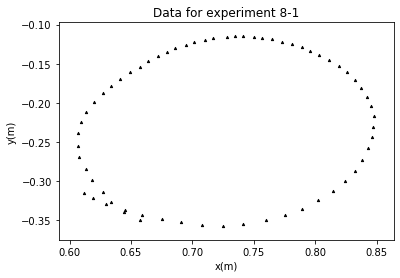

In [4]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(exp81[:,1], exp81[:,2], marker='^', color='black', s = 5)
plt.xlabel('x(m)')
plt.ylabel('y(m)')
plt.title('Data for experiment 8-1')
plt.show()

I only kept the data with circular orbit, manually(hard to write down the code that finds the circle...).

Then we start the $\textit{circular}$ curve fit. First, I've calculated the $R^{2}$ value for the Experiment 8, epoch 1.

In [20]:
from scipy import optimize

x = exp81[:,1]
y = exp81[:,2]
x_m = np.mean(x)
y_m = np.mean(y)

def calc_R(xc, yc):
    return sqrt((x-xc)**2 + (y-yc)**2)

def f(c):
    Ri = calc_R(*c)
    return Ri - Ri.mean()

center_estimate = x_m, y_m
center, ier = optimize.leastsq(f, center_estimate)

xc, yc = center
Ri = calc_R(*center)
R = Ri.mean()
residue = sum((Ri - R)**2)

tot = sum((y - np.mean(y)) ** 2)
r_sq = 1 - (residue / tot)
print(r_sq)

0.9950586159467494


Now calculate the $R^{2}$ for all the other cases.

In [21]:
def Circular_cf(a):
    x = a[:,1]
    y = a[:,2]
    x_m = np.mean(x)
    y_m = np.mean(y)
    
    def calc_R(xc, yc):
        return sqrt((x-xc)**2 + (y-yc)**2)

    def f(c):
        Ri = calc_R(*c)
        return Ri - Ri.mean()

    center_estimate = x_m, y_m
    center, ier = optimize.leastsq(f, center_estimate)

    xc, yc = center
    Ri = calc_R(*center)
    R = Ri.mean()
    residue = sum((Ri - R)**2)

    tot = sum((y - np.mean(y)) ** 2)
    r_sq = 1 - (residue / tot)
    return r_sq

r_sq = np.zeros(24).reshape(12,2)

r_sq[0,0] = 51
r_sq[1,0] = 52
r_sq[2,0] = 61
r_sq[3,0] = 62
r_sq[4,0] = 63
r_sq[5,0] = 64
r_sq[6,0] = 71
r_sq[7,0] = 72
r_sq[8,0] = 81
r_sq[9,0] = 82
r_sq[10,0] = 83
r_sq[11,0] = 84

r_sq[0,1] = Circular_cf(exp51)
r_sq[1,1] = Circular_cf(exp52)
r_sq[2,1] = Circular_cf(exp61)
r_sq[3,1] = Circular_cf(exp62)
r_sq[4,1] = Circular_cf(exp63)
r_sq[5,1] = Circular_cf(exp64)
r_sq[6,1] = Circular_cf(exp71)
r_sq[7,1] = Circular_cf(exp72)
r_sq[8,1] = Circular_cf(exp81)
r_sq[9,1] = Circular_cf(exp82)
r_sq[10,1] = Circular_cf(exp83)
r_sq[11,1] = Circular_cf(exp84)

print(r_sq)

[[51.          0.99652309]
 [52.          0.99583092]
 [61.          0.99383869]
 [62.          0.99593229]
 [63.          0.994234  ]
 [64.          0.9933242 ]
 [71.          0.99830412]
 [72.          0.99644378]
 [81.          0.99505862]
 [82.          0.9966326 ]
 [83.          0.99493795]
 [84.          0.99489962]]
